### KPMG Virtual Internship

#### Importing Important Libraries

In [2]:
# Importing Libraries
import warnings 
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import datetime as dt
import math as ma
# from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

#### Importing Dataset

In [3]:
# Import datasets
Xls = pd.ExcelFile(r"F:\KPMG Virtual Internship\Task 2 Data Insights\KPMG_VI_final.xlsx")
df = pd.read_excel(Xls, "CustomerDemographic")
df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


#### Checking Shape of Dataset

In [4]:
df.shape

(4000, 13)

#### CHecking for duplicates in Dataset

In [5]:
df.duplicated().sum()

0

#### Checking the Quantity Spread of Dataset

In [6]:
df.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,4000.000000,4000.000000,3913.000000
mean,2000.500000,48.890000,10.657041
std,1154.844867,28.715005,5.660146
min,1.000000,0.000000,1.000000
25%,1000.750000,24.000000,6.000000
50%,2000.500000,48.000000,11.000000
75%,3000.250000,73.000000,15.000000
max,4000.000000,99.000000,22.000000


#### Checking for Null Values

In [7]:
df.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

#### Treating Missing Values

In [8]:
df['last_name'].fillna(method='ffill', inplace = True)

In [9]:
df['DOB'].fillna(method='ffill', inplace = True)

In [10]:
df['DOB'] = df['DOB'].apply(pd.to_datetime)

In [11]:
df.dtypes

customer_id                                     int64
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
default                                        object
owns_car                                       object
tenure                                        float64
dtype: object

#### Creating new Age Column

In [12]:
ref_date = dt.datetime.now()
df['Age'] = df['DOB'].apply(lambda x: len(pd.date_range(start = x, end = ref_date, freq = 'Y')))

#### Treating Incomplete or Wrong Spelling

In [13]:
#df.replace(to_replace ="F", value ="Female")
#df.head()

In [14]:
df1 = df.replace(to_replace =["F", "Femal"], value ="Female")
df1.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,Age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,69
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,42
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0,68
3,4,Talbot,Dearle,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,61
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0,45


In [15]:
df2 = df1.replace(to_replace ="M", value ="Male")
df2.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,Age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,69
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,42
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0,68
3,4,Talbot,Dearle,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,61
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0,45


#### Missing Value Treament

In [16]:
df['tenure'] = df['tenure'].fillna(df['tenure'].mean())
#df['tenure'].fillna(method='ffill', inplace = True)

In [17]:
#df['tenure'] = df['tenure'].fillna(df['tenure'].mean())

In [18]:
df['job_title'].fillna(method='ffill', inplace = True)

In [19]:
df['job_industry_category'].fillna(method='ffill', inplace = True)

In [20]:
#df['default'].fillna(method='ffill', inplace = True)

#### Checking Null Values Again

In [21]:
df2.isnull().sum()

customer_id                              0
first_name                               0
last_name                                0
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                      0
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
Age                                      0
dtype: int64

#### Visualization

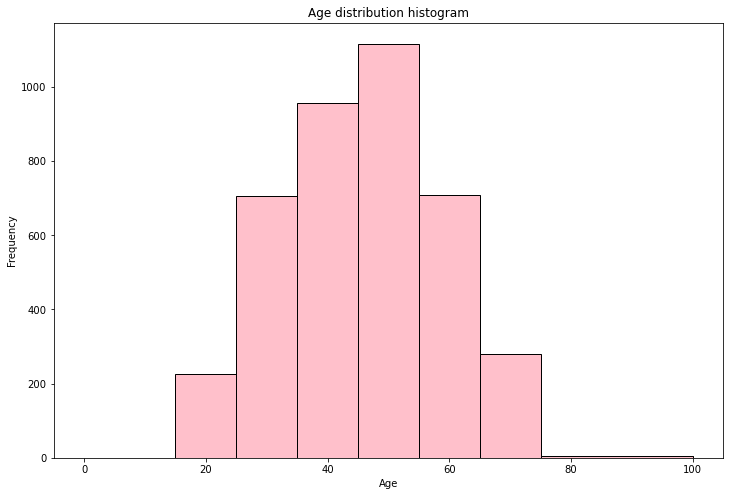

In [22]:
#Data visualisation
plt.figure(figsize = (12,8))
plt.hist(df2['Age'], color = 'pink', edgecolor = 'black', bins=[0, 15, 25, 35, 45, 55, 65, 75, 100]) # bins=[0,24,44,64,100]
plt.title('Age distribution histogram')
plt.xlabel('Age')
plt.ylabel('Frequency')
#plt.savefig('age_dist_histogram.png')
plt.show()

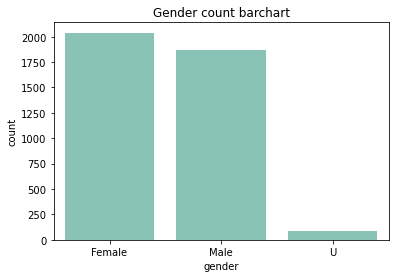

In [23]:
sn.countplot(x = 'gender', data = df2, palette= ["#7fcdbb"])
plt.title('Gender count barchart')
#plt.savefig('gender_count_original.png')
plt.show()

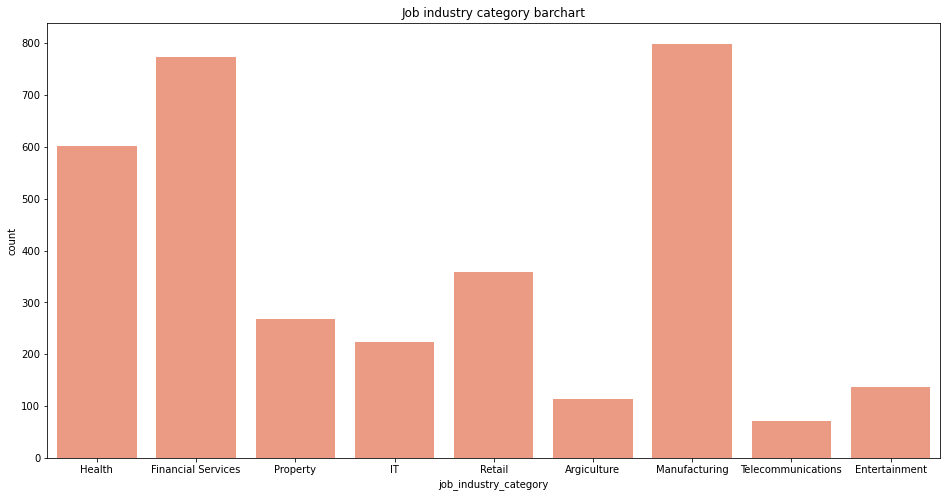

In [24]:
plt.figure(figsize = (16,8))
sn.countplot(x='job_industry_category', data = df2, palette= ["#fc9272"])  # palette=["#bcbddc"]  ["#efedf5"]  ["#fc9272"]
plt.title('Job industry category barchart')
#plt.savefig('job_industry_original.png')
plt.show()

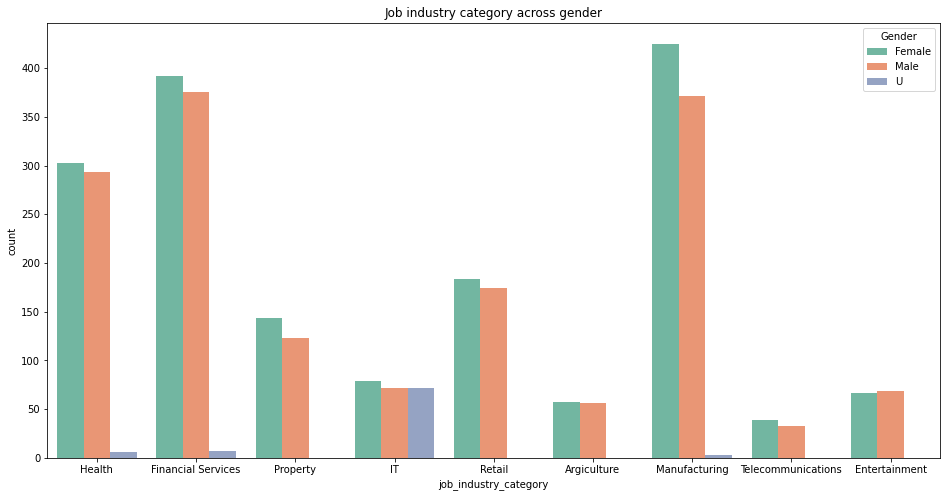

In [25]:
plt.figure(figsize = (16,8))
sn.countplot(x='job_industry_category', data=df2, hue='gender', palette = "Set2")
plt.legend(title='Gender', loc='upper right', fancybox=True)
plt.title('Job industry category across gender')
#plt.savefig('job_industry-gender_original.png')
plt.show()

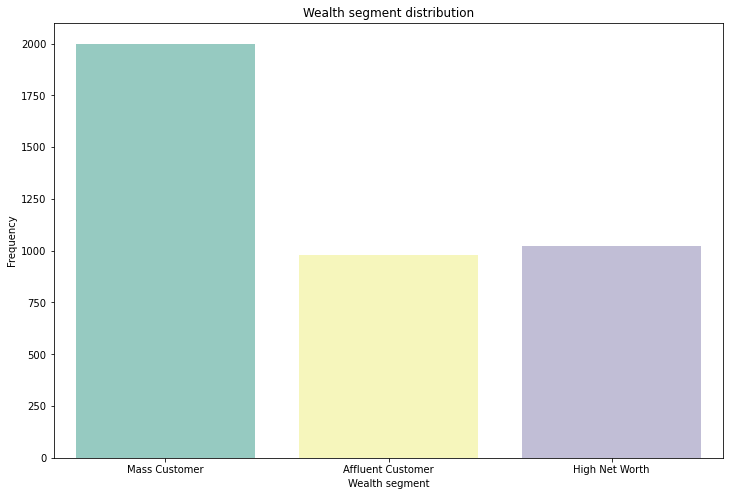

In [26]:
plt.figure(figsize = (12,8))
sn.countplot(x = 'wealth_segment', data = df2, palette = "Set3")
plt.title('Wealth segment distribution')
plt.xlabel('Wealth segment')
plt.ylabel('Frequency')
#plt.savefig('wealth_segment_original.png')
plt.show()

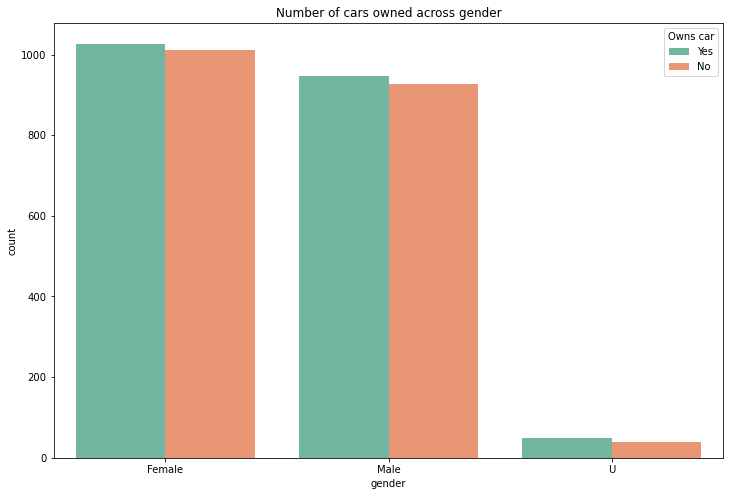

In [27]:
plt.figure(figsize = (12,8))
sn.countplot(x='gender', data=df2, hue='owns_car', palette = "Set2")
plt.legend(title='Owns car', loc='upper right', fancybox=True)
plt.title('Number of cars owned across gender')
plt.savefig('owns_car_original.png')
plt.show()

<Figure size 864x576 with 0 Axes>

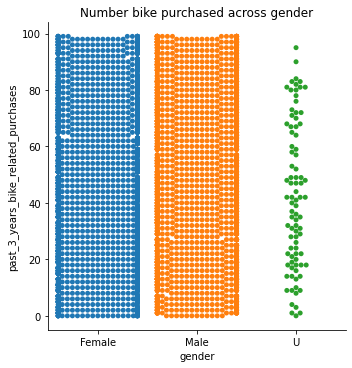

In [28]:
plt.figure(figsize = (12,8))
sn.catplot(data=df2, x='gender', y='past_3_years_bike_related_purchases', kind='swarm')
plt.title('Number bike purchased across gender')
#plt.savefig('bike_purchase_original.png')
plt.show()

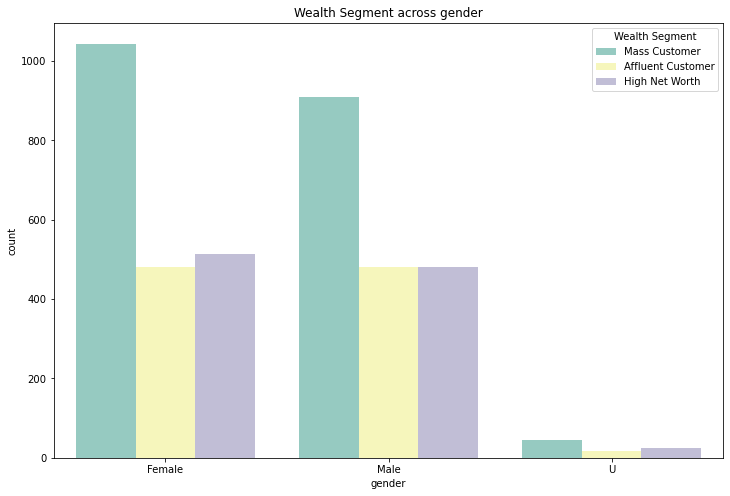

In [29]:
plt.figure(figsize = (12,8))
sn.countplot(x='gender', data=df2, hue='wealth_segment', palette = "Set3")
plt.legend(title='Wealth Segment', loc='upper right', fancybox=True)
plt.title('Wealth Segment across gender')
#plt.savefig('wealth_segment-gender_original.png')
plt.show()

<Figure size 1152x576 with 0 Axes>

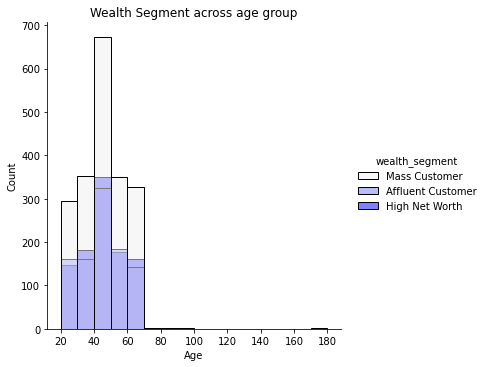

In [30]:
plt.figure(figsize = (16,8))
sn.displot(x='Age', binwidth=10, data=df2, hue='wealth_segment', palette= "light:b")
plt.title('Wealth Segment across age group')
#plt.savefig('wealth_segment-age_original.png')
plt.show()

#### Importing Dataset

In [31]:
# Import datasets
Xls = pd.ExcelFile(r"F:\KPMG Virtual Internship\Task 2 Data Insights\KPMG_VI_final.xlsx")
df5 = pd.read_excel(Xls, "CustomerAddress")
df5.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


#### Merging Datasets

In [32]:
# df6 = df2[["customer_id", "STUDENT EMAIL ID "]].merge(df5[["customer_id", "address", "postcode", "country", "property_valuation"]], on = "customer_id", how = "left")
df6 = df2.merge(df5[["customer_id", "address", "postcode", "state","country", "property_valuation"]], on = "customer_id", how = "left")
df6.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,Age,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,69,060 Morning Avenue,2016.0,New South Wales,Australia,10.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,42,6 Meadow Vale Court,2153.0,New South Wales,Australia,10.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0,68,NaN,NaN,NaN,NaN,NaN
3,4,Talbot,Dearle,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,61,0 Holy Cross Court,4211.0,QLD,Australia,9.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0,45,17979 Del Mar Point,2448.0,New South Wales,Australia,4.0


In [33]:
df7 = df6.replace(to_replace =["New South Wales", "Victoria"], value ="NSW")
df7.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,Age,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,69,060 Morning Avenue,2016.0,NSW,Australia,10.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,42,6 Meadow Vale Court,2153.0,NSW,Australia,10.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0,68,NaN,NaN,NaN,NaN,NaN
3,4,Talbot,Dearle,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,61,0 Holy Cross Court,4211.0,QLD,Australia,9.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0,45,17979 Del Mar Point,2448.0,NSW,Australia,4.0


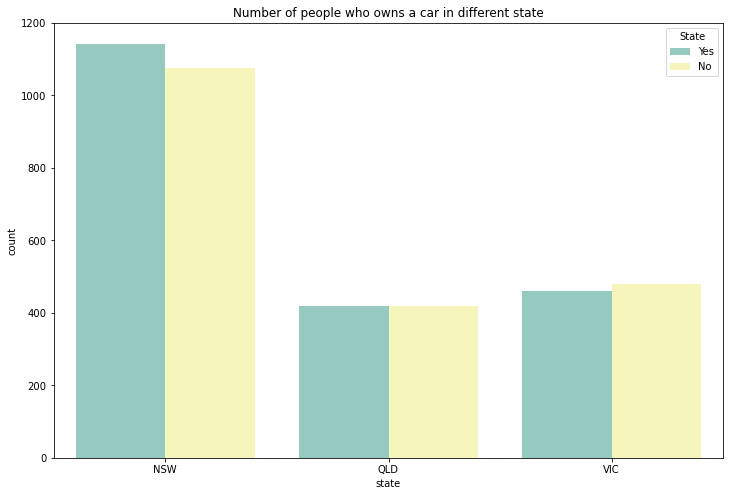

In [34]:
plt.figure(figsize = (12,8))
sn.countplot(x = 'state', data = df7, hue = 'owns_car', palette = "Set3")
plt.legend(title='State', loc='upper right', fancybox=True)
plt.title('Number of people who owns a car in different state')
#plt.savefig('owns_car-state_original.png')
plt.show()

#### Importing Dataset

In [35]:
# Import datasets
Xls = pd.ExcelFile(r"F:\KPMG Virtual Internship\Task 2 Data Insights\KPMG_VI_final.xlsx")
df3 = pd.read_excel(Xls, "NewCustomerList")
df3.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.42,0.5250,0.65625,0.557812,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,1.06,1.0600,1.32500,1.126250,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.41,0.4100,0.41000,0.410000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.69,0.8625,0.86250,0.862500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,1.03,1.0300,1.28750,1.287500,4,4,1.703125


In [36]:
df3.duplicated().sum()

0

In [37]:
df3.shape

(1000, 23)

In [38]:
df3['DOB'] = pd.to_datetime(df3['DOB'], errors='coerce')

In [39]:
df3.dtypes

first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
owns_car                                       object
tenure                                          int64
address                                        object
postcode                                        int64
state                                          object
country                                        object
property_valuation                              int64
Unnamed: 16                                   float64
Unnamed: 17                                   float64
Unnamed: 18                 

In [40]:
df3['DOB'] = df3['DOB'].apply(lambda x: x.strftime('%Y-%m-%d')if not pd.isnull(x) else '')

In [41]:
df3['DOB'].astype('datetime64')

0     1957-07-12
1     1970-03-22
2     1974-08-28
3     1979-01-28
4     1965-09-21
         ...    
995   1959-10-07
996   2001-10-17
997   1954-10-05
998   1952-12-17
999   1955-10-02
Name: DOB, Length: 1000, dtype: datetime64[ns]

In [42]:
df3['DOB'] = df3['DOB'].fillna(df3['DOB'].mode())

In [43]:
ref_date2 = dt.datetime.now()
df3['Age'] = df3['DOB'].apply(lambda x: len(pd.date_range(start = x, end = ref_date2, freq = 'Y')) if str(x) else None)

In [44]:
df3.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,Age
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,Australia,6,0.42,0.5250,0.65625,0.557812,1,1,1.718750,65.0
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,Australia,11,1.06,1.0600,1.32500,1.126250,1,1,1.718750,52.0
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,Australia,5,0.41,0.4100,0.41000,0.410000,1,1,1.718750,48.0
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,Australia,1,0.69,0.8625,0.86250,0.862500,4,4,1.703125,43.0
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,Australia,9,1.03,1.0300,1.28750,1.287500,4,4,1.703125,57.0


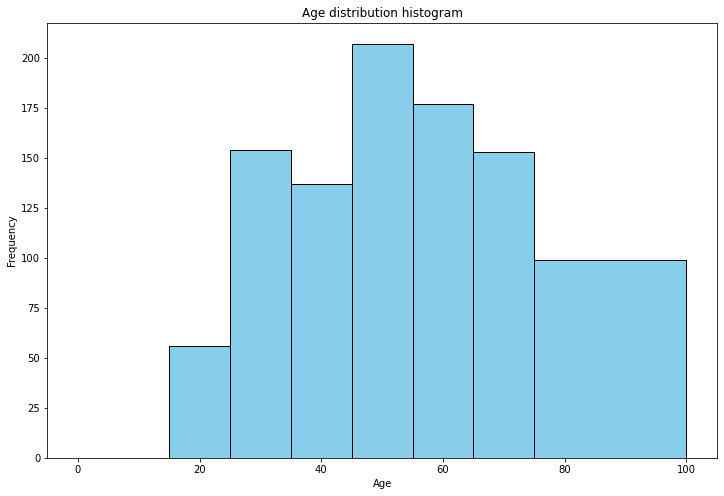

In [45]:
#Data visualisation
plt.figure(figsize = (12,8))
plt.hist(df3['Age'], color = 'skyblue', edgecolor = 'black', bins=[0, 15, 25, 35, 45, 55, 65, 75, 100]) # bins=[0,24,44,64,100]
plt.title('Age distribution histogram')
plt.xlabel('Age')
plt.ylabel('Frequency')
#plt.savefig('age_dist_histogram.png')
plt.show()

In [46]:
df4 = df3.replace(to_replace =["U"], value ="Female")
df4.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,Age
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,Australia,6,0.42,0.5250,0.65625,0.557812,1,1,1.718750,65.0
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,Australia,11,1.06,1.0600,1.32500,1.126250,1,1,1.718750,52.0
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,Australia,5,0.41,0.4100,0.41000,0.410000,1,1,1.718750,48.0
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,Australia,1,0.69,0.8625,0.86250,0.862500,4,4,1.703125,43.0
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,Australia,9,1.03,1.0300,1.28750,1.287500,4,4,1.703125,57.0


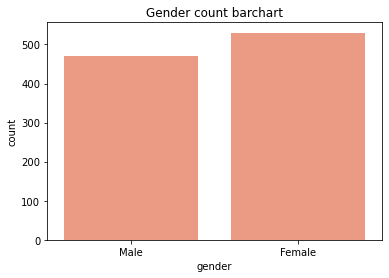

In [47]:
sn.countplot(x = 'gender', data = df4, palette= ["#fc9272"])
plt.title('Gender count barchart')
#plt.savefig('gender_count_new.png')
plt.show()

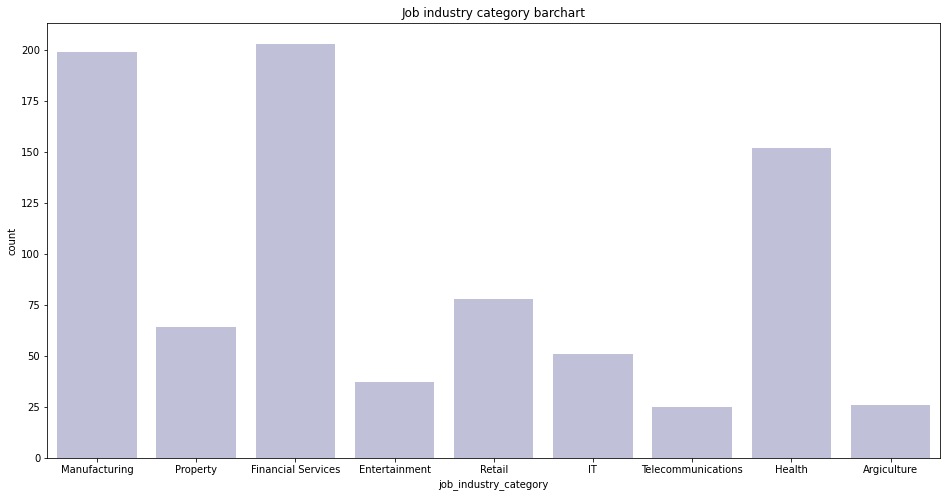

In [48]:
plt.figure(figsize = (16,8))
sn.countplot(x='job_industry_category', data = df4, palette=["#bcbddc"]) # palette=["#bcbddc"]  ["#efedf5"]  ["#fc9272"]
plt.title('Job industry category barchart')
#plt.savefig('job_industry_new.png')
plt.show()

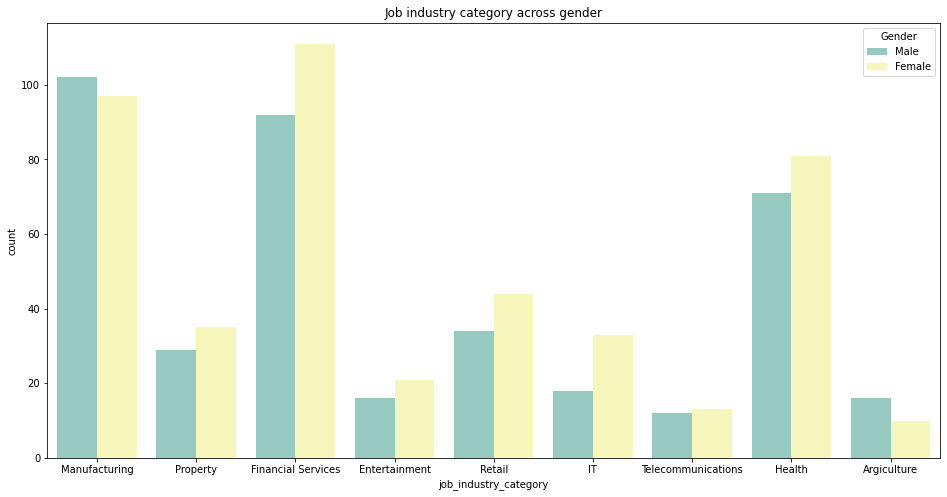

In [49]:
plt.figure(figsize = (16,8))
sn.countplot(x='job_industry_category', data=df4, hue='gender', palette = "Set3")
plt.legend(title='Gender', loc='upper right', fancybox=True)
plt.title('Job industry category across gender')
#plt.savefig('job_industry-gender_new.png')
plt.show()

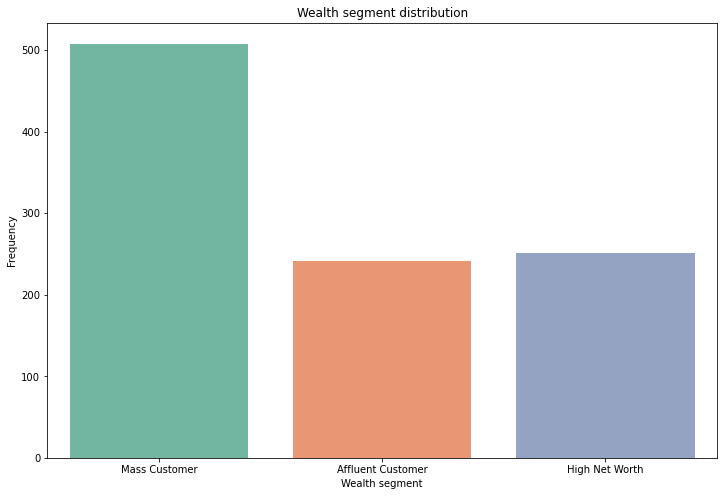

In [50]:
plt.figure(figsize = (12,8))
sn.countplot(x = 'wealth_segment', data = df4, palette = "Set2")
plt.title('Wealth segment distribution')
plt.xlabel('Wealth segment')
plt.ylabel('Frequency')
#plt.savefig('wealth_segment_new.png')
plt.show()

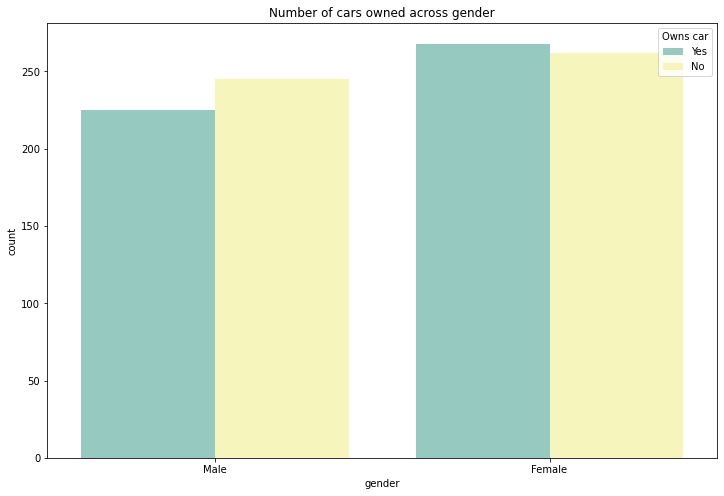

In [51]:
plt.figure(figsize = (12,8))
sn.countplot(x='gender', data=df4, hue='owns_car', palette = "Set3")
plt.legend(title='Owns car', loc='upper right', fancybox=True)
plt.title('Number of cars owned across gender')
plt.savefig('owns_car_new.png')
plt.show()

<Figure size 864x576 with 0 Axes>

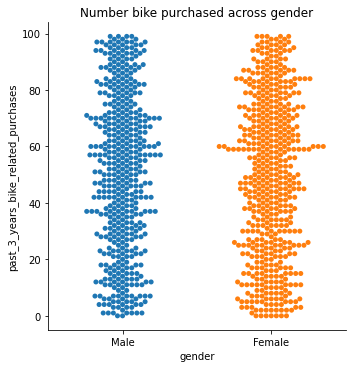

In [52]:
plt.figure(figsize = (12,8))
sn.catplot(data=df4, x='gender', y='past_3_years_bike_related_purchases', kind='swarm')
plt.title('Number bike purchased across gender')
#plt.savefig('bike_purchase_new.png')
plt.show()

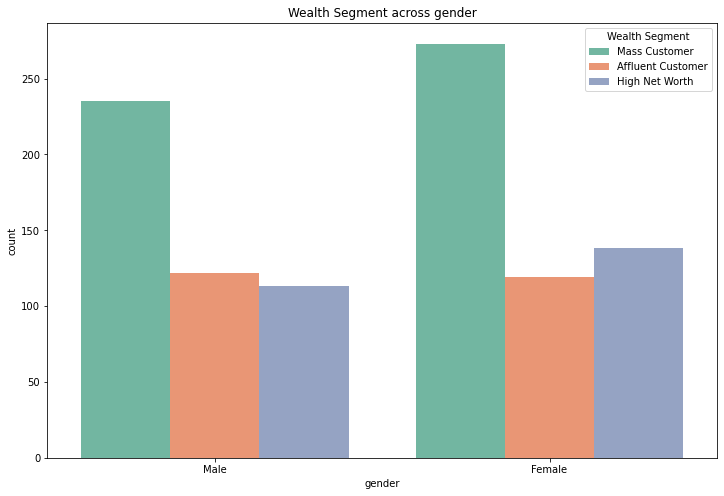

In [53]:
plt.figure(figsize = (12,8))
sn.countplot(x='gender', data=df4, hue='wealth_segment', palette = "Set2")
plt.legend(title='Wealth Segment', loc='upper right', fancybox=True)
plt.title('Wealth Segment across gender')
#plt.savefig('wealth_segment-gender_new.png')
plt.show()

<Figure size 1152x576 with 0 Axes>

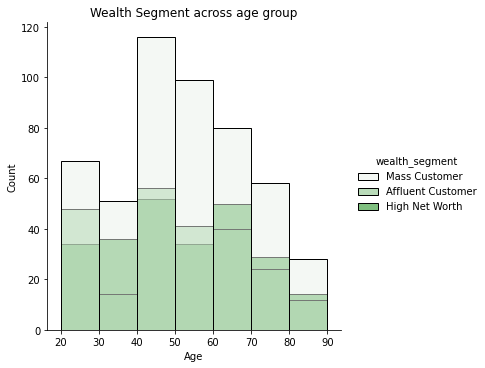

In [54]:
plt.figure(figsize = (16,8))
sn.displot(x='Age', binwidth=10, data=df4, hue='wealth_segment', palette= "light:g")
plt.title('Wealth Segment across age group')
#plt.savefig('wealth_segment-age_new.png')
plt.show()

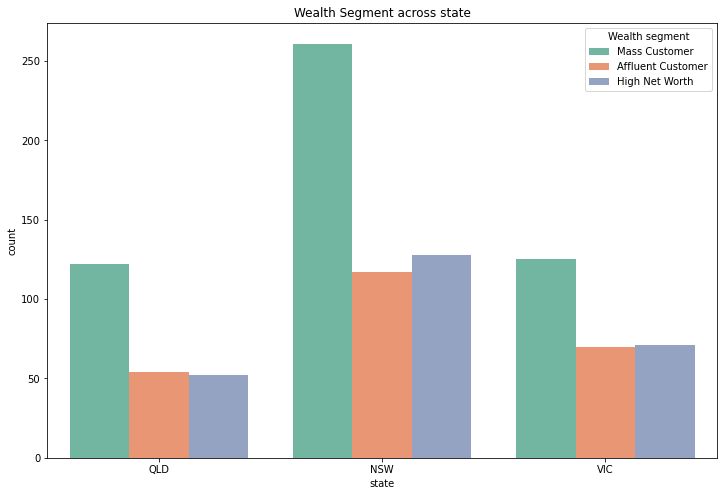

In [55]:
plt.figure(figsize = (12,8))
sn.countplot(x='state', data=df4, hue='wealth_segment', palette = "Set2")
plt.legend(title='Wealth segment', loc='upper right', fancybox=True)
plt.title('Wealth Segment across state')
#plt.savefig('wealth_segment-state_new.png')
plt.show()